In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Install or upgrade necessary libraries
!pip install --upgrade numpy
!pip install --upgrade tensorflow

# Import TensorFlow and Keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM




  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.3 which is incompatible.


  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [3]:
#checking my tensorflow version
tf.__version__

'2.12.0'

In [4]:

#Import the data and remove rows containing NAN values
df = pd.read_csv(r'C:\Users\Dharshana\Downloads\NSE-TATAGLOBAL (1).csv')

df=df. iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [5]:
df.tail()
     

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [6]:

#Data Preprocessing
df.isnull().sum()
     

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:

df.shape

(2035, 8)

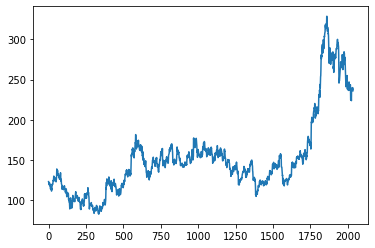

In [8]:

df_high=df.reset_index()['High']
plt.plot(df_high)
     

In [9]:
#Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))
     

df_high.shape
     

(2035, 1)

In [10]:


df_high
     

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [11]:

#Split the data into train and test split
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

     

training_size,test_size

(1526, 509)

In [12]:

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

    
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
     

#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


print(x_train.shape), print(y_train.shape)
     

(1425, 100, 1)
(1425,)


(None, None)

In [13]:

print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

In [14]:

#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)
     

Epoch 1/100
23/23 [==============================] - 23s 482ms/step - loss: 0.0106 - val_loss: 0.0207
Epoch 2/100
23/23 [==============================] - 8s 337ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 3/100
23/23 [==============================] - 8s 358ms/step - loss: 9.1744e-04 - val_loss: 0.0036
Epoch 4/100
23/23 [==============================] - 8s 345ms/step - loss: 8.5054e-04 - val_loss: 0.0034
Epoch 5/100
23/23 [==============================] - 8s 365ms/step - loss: 8.1939e-04 - val_loss: 0.0039
Epoch 6/100
23/23 [==============================] - 8s 367ms/step - loss: 7.7980e-04 - val_loss: 0.0045
Epoch 7/100
23/23 [==============================] - 8s 364ms/step - loss: 7.3726e-04 - val_loss: 0.0040
Epoch 8/100
23/23 [==============================] - 8s 352ms/step - loss: 7.0886e-04 - val_loss: 0.0038
Epoch 9/100
23/23 [==============================] - 8s 368ms/step - loss: 6.5132e-04 - val_loss: 0.0074
Epoch 10/100
23/23 [==============================] - 8s 354ms

In [16]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

     

#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
     

13/13 [==============================] - 1s 67ms/step


In [17]:

#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

136.01837777765093

In [18]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

231.1562132074544

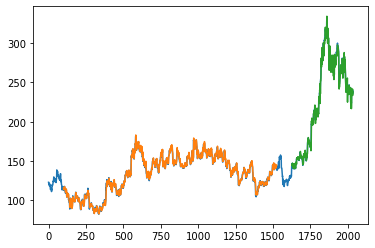

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [19]:

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [20]:

#Predict the next 28 days Stock Price
len(test_data), x_test.shape

(509, (408, 100, 1))

In [21]:

x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [25]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
nextNumberOfDays = 28
i = 0

while i < nextNumberOfDays:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


[0.6183756]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

In [26]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)
     

day_new.shape

(100,)

In [27]:
day_pred.shape

(28,)

In [28]:

df3 = df_high.tolist()
df3.extend(lst_output)

len(df_high)
     

2035

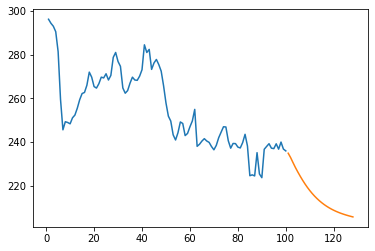

In [29]:

plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
     

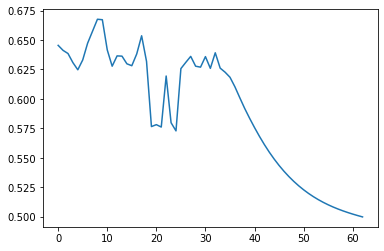

In [30]:

df3=df_high.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

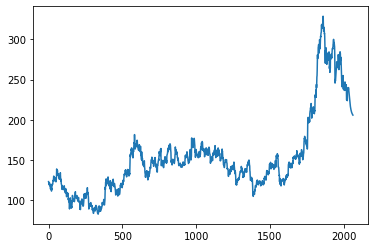

In [31]:
df3=scaler.inverse_transform(df3).tolist()
     

plt.plot(df3)